Brain Tumour Detection- Data Exploration

Testing Data Set

In [1]:
import os

In [2]:
dataset_dir=r'C:\Users\POORNIMA\Desktop\POORNIMA\DataScienceProjects\Final Project\brain_tumor_dataset (1)\Testing'
classes=os.listdir(dataset_dir)
print("Classes found",classes)

Classes found ['glioma', 'meningioma', 'notumor', 'pituitary']


In [3]:
total_images=0
class_image_count={}
for class_name in classes:
    classpath=os.path.join(dataset_dir,class_name)
    num_images=len(os.listdir(classpath))
    total_images+=num_images
    class_image_count[class_name]=num_images
    print(f"class:{class_name},Number of images:{num_images}")
    
print("Total images in all classes:",{total_images})

class:glioma,Number of images:300
class:meningioma,Number of images:306
class:notumor,Number of images:405
class:pituitary,Number of images:300
Total images in all classes: {1311}


In [4]:
import os
import pandas as pd
from PIL import Image

image_dimension_data=[]
for class_name in classes:
    classpath=os.path.join(dataset_dir,class_name)
# Iterate through all images in the folder
    for image_name in os.listdir(classpath):
        image_path = os.path.join(classpath, image_name)
        
        # Check if it's an image file (e.g., jpg, png)
        if image_path.lower().endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif')):
            with Image.open(image_path) as img:
                # Get image dimensions
                width, height = img.size
                image_dimension_data.append({'class_name': class_name,
                    'image_name': image_name,
                    'width': width,
                    'height': height,
                    'img_dim':(width, height)
                                             
                })

image_dim_df = pd.DataFrame(image_dimension_data)
print("Total number of images in the DataFrame",len(image_dim_df))


Total number of images in the DataFrame 1311


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

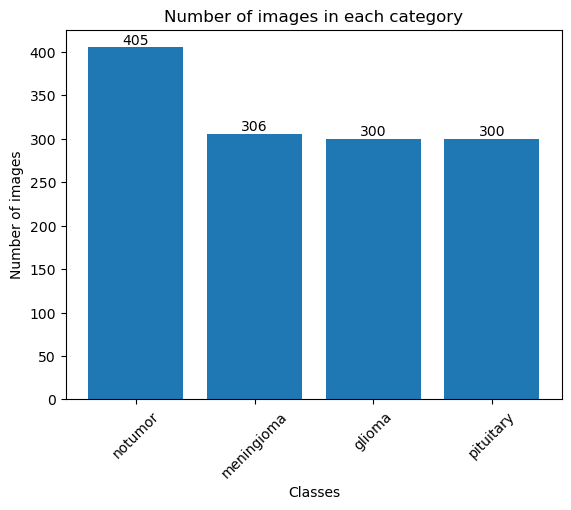

In [6]:
 
fig, ax = plt.subplots()
class_counts = image_dim_df['class_name'].value_counts()
bars = ax.bar(class_counts.index, class_counts.values)
ax.bar_label(bars)
plt.title('Number of images in each category')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

plt.show()

In [7]:
distinct_image_dim=image_dim_df['img_dim'].unique()

In [8]:
distinct_image_dim

array([(512, 512), (440, 278), (257, 307), (228, 221), (212, 237),
       (528, 581), (295, 394), (219, 234), (262, 308), (206, 249),
       (530, 526), (455, 500), (200, 223), (472, 546), (441, 427),
       (540, 568), (507, 605), (290, 339), (591, 650), (534, 674),
       (300, 345), (306, 306), (374, 370), (201, 207), (291, 340),
       (630, 423), (318, 354), (554, 554), (315, 341), (286, 356),
       (278, 306), (252, 303), (442, 442), (312, 401), (300, 412),
       (205, 251), (300, 258), (204, 249), (239, 224), (323, 342),
       (290, 342), (366, 395), (416, 395), (256, 256), (402, 396),
       (369, 395), (343, 367), (369, 398), (313, 393), (330, 355),
       (367, 395), (411, 396), (234, 216), (232, 261), (645, 439),
       (314, 195), (217, 232), (352, 322), (216, 216), (257, 248),
       (174, 230), (206, 245), (1149, 1019), (722, 690), (315, 315),
       (351, 398), (341, 395), (341, 372), (273, 326), (239, 248),
       (289, 354), (305, 337), (304, 410), (208, 243), (221,

In [9]:
len(distinct_image_dim)

194

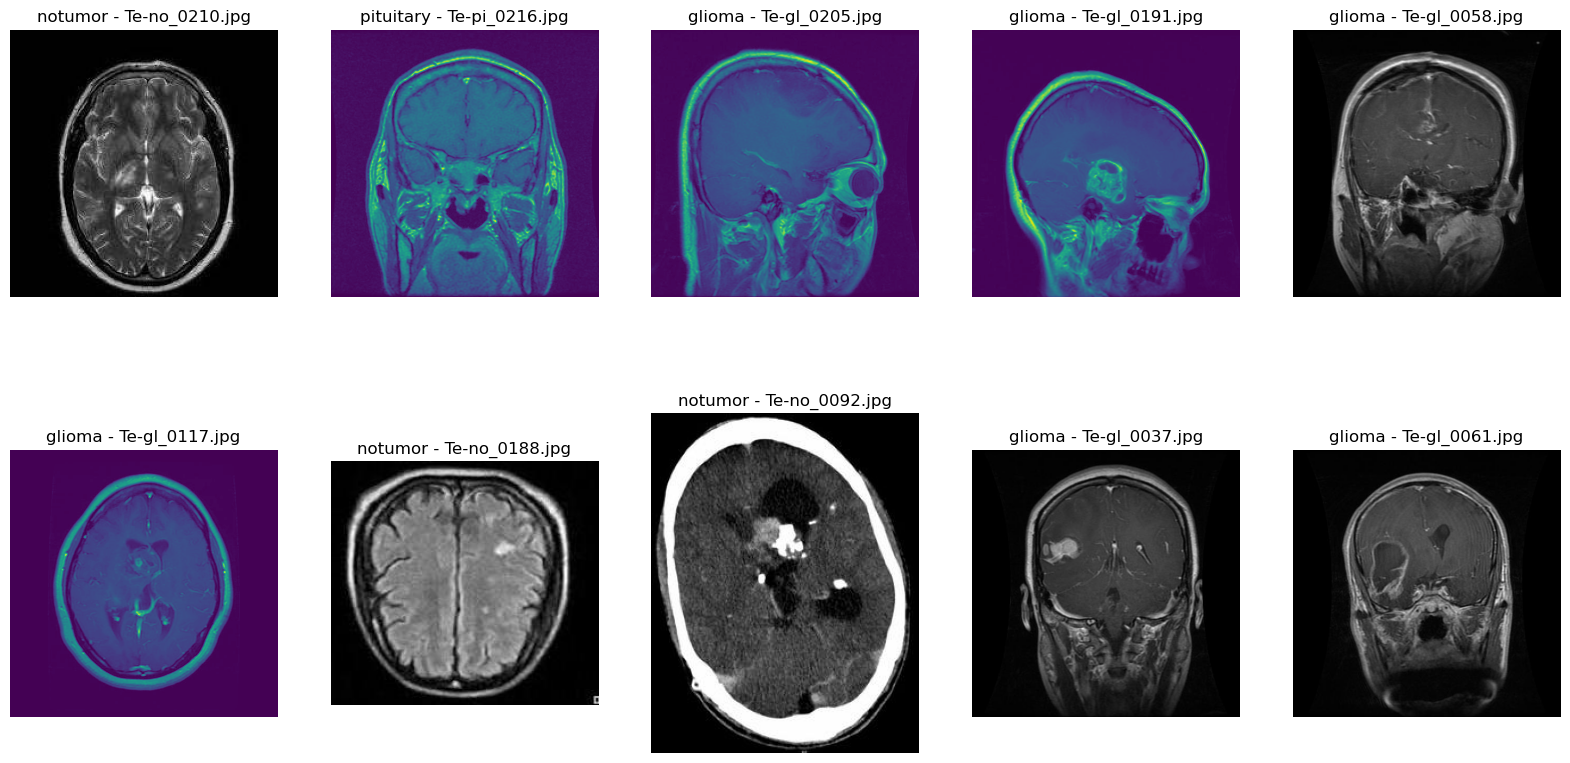

In [10]:
import matplotlib.pyplot as plt

# Sample images visualization
sample_images = image_dim_df.sample(10)  # Randomly select 5 images

plt.figure(figsize=(20, 10))
for i, (index, row) in enumerate(sample_images.iterrows()):
    image_path = os.path.join(dataset_dir, row['class_name'], row['image_name'])
    img = Image.open(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"{row['class_name']} - {row['image_name']}")
    plt.axis('off')
plt.show()
